# Mathematics of Machine Learning

## Programming tasks: 
### Script for evaluation of learned hypothesis  using perceptron for MNIST.

Import required modules

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from my_perceptron import my_perceptron

Load data

In [3]:
# Load data
x = np.genfromtxt("data_MNIST_X.csv", delimiter=',')

In [4]:
y = np.genfromtxt("data_MNIST_Y.csv", delimiter=',')
y

array([7., 7., 7., ..., 8., 8., 8.])

Transfom the labels in +1 (7) and -1 (8)

In [5]:
# Transfom the labels in +1 (7) and -1 (8)
# y = (y == 7) - (y == 8)
for ind, val in enumerate(y):
    if val == 7:
        y[ind] = +1
    else:
        y[ind] = -1

Start the perceptron algorithm

In [6]:
start = datetime.datetime.now().time()
print(start)
[w, T, ws, RSs] = my_perceptron(x, [y], 1, 2000)
end = datetime.datetime.now().time()
print(end)
# print([w, T, ws, RSs])

08:13:08.473808
08:16:32.151243


Definition and output of the learned hypothesis (in 7 and 8)

In [7]:
def h_S(x): return 7.5 - 0.5 * np.sign(np.dot(w.T, np.append(x, np.ones((1)), axis=0)))

### (a) How many misclassifications are there in the training dataset?

In [8]:
# the number of data m from y
m = np.size([y], axis=1)
print(m)

12116


In [9]:
# Function to check the constraints
def check(w, x, y): return np.multiply(y, np.dot(w.T, np.append(x, np.ones((1, m)), axis=0)))

In [10]:
# Percentage of misclassified images
np.mean(check(w, x, [y]) <= 0)

0.009491581379993397

### (b) Find examples of misclassified images

In [11]:
# find indexes of misclassified images
inds = [i for (i, val) in enumerate(check(w, x, [y])[0]) if val <= 0]
# print(inds)

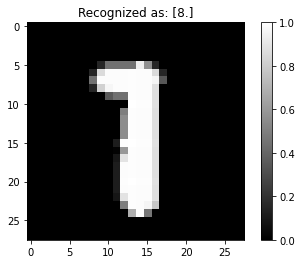

In [12]:
# plot the first of these pictures
x_first = x[:, inds[0]]
# print(x_first)
# print(x_first, (28, 28))
im = plt.imshow(np.reshape(x_first, (28, 28)), cmap='gray')
plt.title(f'Recognized as: {h_S(x_first)}')
plt.colorbar(im)
plt.show()

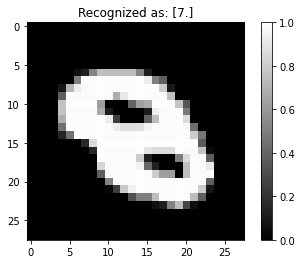

In [13]:
# plot the last of these pictures
x_last = x[:, inds[-1]]
im = plt.imshow(np.reshape(x_last, (28, 28)), cmap='gray')
plt.title(f'Recognized as: {h_S(x_last)}')
plt.colorbar(im)
plt.show()

### (c) Select correctly classified image

In [14]:
# find indexes of correctly classified images
inds_correct = [i for (i, val) in enumerate(check(w, x, [y])[0]) if val > 0]
# print(inds_correct)

In [15]:
# Random selection by random component of indexes
i = np.random.choice(inds_correct)
print(i)

922


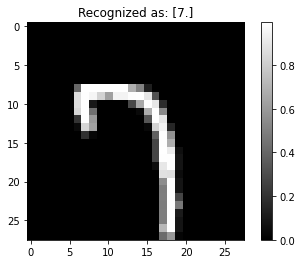

In [16]:
# plot the image
x_item = x[:, i]
y_item = y[i]
im = plt.imshow(np.reshape(x_item, (28, 28)), cmap='gray')
plt.title(f'Recognized as: {h_S(x_item)}')
plt.colorbar(im)
plt.show()

In [17]:
# determine disturbance direction v (depending on the label of x)
if y_item > 0: 
    v = np.multiply(w, (w < 0)) # negative part of w
else:
    v = np.multiply(w, (w > 0)) # positive part of w

In [18]:
# omit bias
v = v[:-1]

In [19]:
# find correct scale e: 
e = - 1.1 * np.dot(w.T, np.append(x_item, np.ones((1)), axis=0)) / np.dot(w[:-1].T, v)

In [20]:
# Checking whether thereafter actually misclassified
(y_item * np.dot(w.T, np.append(x_item + (e*v).T[0], np.ones((1)), axis=0))) < 0

array([ True])

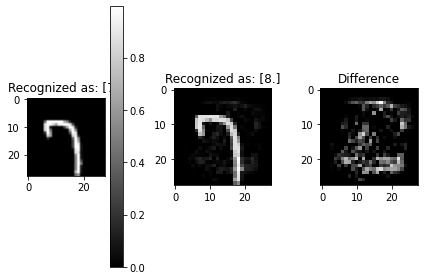

In [42]:
# Plot the images and disturbances
fig, axs = plt.subplots(1, 3)
axs_0 = axs[0].imshow(np.reshape(x_item, (28, 28)), cmap='gray')
axs[0].set_title(f'Recognized as: {h_S(x_item)}')
fig.colorbar(axs_0_0, ax = axs[0])
axs[1].imshow(np.reshape(x_item + (e*v).T[0], (28, 28)), cmap='gray')
axs[1].set_title(f'Recognized as: {h_S(x_item + (e*v.T)[0])}')
axs[2].imshow(np.reshape(((e*v).T)[0], (28, 28)), cmap='gray')
axs[2].set_title('Difference')

fig.tight_layout()
plt.show()

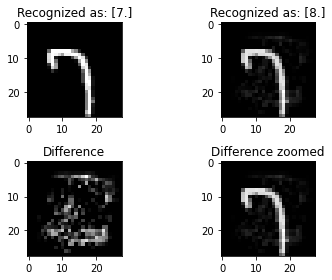

In [22]:
# Plot the images and disturbances
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.reshape(x_item, (28, 28)), cmap='gray')
axs[0, 0].set_title(f'Recognized as: {h_S(x_item)}')
axs[0, 1].imshow(np.reshape(x_item + (e*v).T[0], (28, 28)), cmap='gray')
axs[0, 1].set_title(f'Recognized as: {h_S(x_item + (e*v.T)[0])}')
axs[1, 0].imshow(np.reshape(((e*v).T)[0], (28, 28)), cmap='gray')
axs[1, 0].set_title('Difference')
axs[1, 1].imshow(np.reshape(x_item + (e*v).T[0], (28, 28)), cmap='gray')
axs[1, 1].set_title('Difference zoomed')
fig.tight_layout()
plt.show()